# WeRateDogs Twitter Dataset Wrangling and Analysis
## 1. Gather

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json

% matplotlib inline

### 1.1 Gather `df`: the WeRateDogs Twitter archive

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Gather `df2`: the image prediction from the neural network

In [16]:
# get the 'df2' from the web
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [3]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Gather `df3`

In [13]:
# @get the tweepy api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [12]:
# @write the json file
with open('tweet-json.txt', 'w') as outfile:
    for Id in df.tweet_id:
        try:
            ranking = df[df.tweet_id == Id].index[0] + 1
            print(ranking)
            tweet = api.get_status(Id, tweet_mode='extended')
  
            json.dump(tweet._json,outfile)
            outfile.write('\n')
        
            break
    
        except Exception as e:
            print(str(ranking) + "_" + str(Id) + ": " + str(e)

1


In [4]:
# read the file and convert to dataframe
df3_list = []

with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df3_list.append({'tweet_id': tweet_id, 
                         'retweet_count': retweet_count,
                         'favorite_count': favorite_count})
 
df3 = pd.DataFrame(df3_list)
df3.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## 2. Assess
### 2.1 Assess `df`
#### 2.1.1 Visual Assessement

In [19]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [21]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
1308,707297311098011648,NaN,NaN,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707297311...,10,10,Cassie,None,None,None,None
138,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boomer. He's just checking pup on you. Ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153...,13,10,Boomer,None,None,None,None


From the three tables above, the name of 'a' for a dog in `name` is invalid. There may be some other invalid names like 'a' in the `name` column, so we need to dig into it.

In [22]:
# find the invalid name
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
          ... 
Doobert      1
Stuart       1
Jeb          1
Corey        1
Buddah       1
Robin        1
Livvie       1
Name: name, Length: 957, dtype: int64

It seems that the invalid name include 'a' and 'his', and the pattern is that each invalid name starts with a lowercase letter. These names will be cleaned in the cleaning stage.

Also, since the content in `text` and `expanded_urls` is not clear, we need to check their contents.

In [23]:
# check the `text` content
df.loc[0, 'text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [24]:
# check the `url` content
df.loc[0, 'expanded_urls']

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

It seems that he content in `text` and `url` is not problematic.
#### 2.1.2 Programmatic Assessment

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Some `expanded_urls` are missing and some columns just have a few of records. These data points should be checked.

In [26]:
# check the null 'expanded_urls'
df.loc[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1914,674330906434379776,6.658147e+17,1.637468e+07,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


Most of them seem to be the repies and they should be removed.

In [27]:
df.duplicated().sum()

0

There are no duplicated records.

In [28]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


It seems that there are some problems in the max and min score of `rating_numerator` and `rating_denominator`. These data points will be checked.

In [29]:
# check the invalid score
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
       ... 
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, Length: 18, dtype: int64

In [30]:
# check the invalid score
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
       ... 
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, Length: 40, dtype: int64

There are so many invalid scores which needed to be cleaned.
#### 2.1.3 `df` problems summary

- `df` : All of the replies and retweets are redundant because the research only focuses on the original tweet.
- `df`: Some scores in `rating_numerator` and `rating_denominator` are invalid. All of the score in `rating_denominator` should be 10, and the score in `rating_numerator` should not exceed 15.
- `df`: `source` has some redundant text. The html syntax inside the text should be removed. 
- `df`: The name in the column `name` starting with a lowercase letter is invalid. It is weird to call the dog 'his' or 'a'.
- `df`: Some records in `expanded_urls` are missing. These records are replies to other tweets and they should be removed. 
- `df`: The columns of `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `rating_denominator` are redundant. When all replies and retweets are removed, the columns of `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` only contain np.nan values and it is unnecessary to keep them. And all scores in `rating_denominator` are known to be 10 so it is also unnecessary to keep it.
- `df`: The word 'numerator' in the column name of `rating_numerator` is unecessary and it should be the float type. When the `rating_denominator` is removed, it is better to call the column `rating` rather than `rating_numerator`. Also, it is reasonable to rate .5 on the rating.
- `df`: The column of `timestamp` should not be the string type. It should be the datetime or timestamp object.
- `df`: The structure of doggo, floofer, pupper, and puppo is messy. It should be restructured if we want to analyze the dog type. 

### 2.2 Assess `df2`
#### 2.2.1 Visual Assessment

In [31]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [33]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,Norwegian_elkhound,0.001827,True,cairn,0.001821,True
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True


#### 2.2.2 Programmatic Assessment

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
df2.duplicated().sum()

0

In [36]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


It seems that `df2` does not have major problems.
### 2.3 Assess `df3`
#### 2.3.1 Visual Assessment

In [37]:
df3.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [38]:
df3.tail()

,favorite_count,retweet_count,tweet_id
2349,111,41,666049248165822465
2350,311,147,666044226329800704
2351,128,47,666033412701032449
2352,132,48,666029285002620928
2353,2535,532,666020888022790149


In [39]:
df3.sample(5)

,favorite_count,retweet_count,tweet_id
836,8295,2688,767500508068192258
1172,4229,1268,720059472081784833
1162,5761,2110,723179728551723008
139,29063,8209,865006731092295680
1640,4515,1621,684097758874210310


#### 2.3.2 Programmatic Assessment

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [41]:
df3.duplicated().sum()

0

In [42]:
df3.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


It seems that some max values are wierd. Let's discover the correlation between the favorite and retweet.

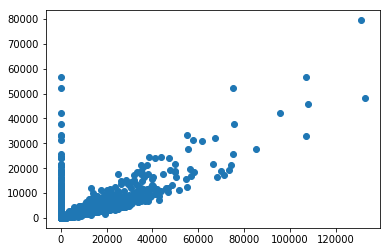

In [43]:
plt.scatter(data=df3, x='favorite_count', y='retweet_count');

It shows that the favorite and retweet are highly correlated. But what is surprising is that there are data points which have 0 favorite and high retweets. These data points will be checked.

In [44]:
df3.query('retweet_count == 0')

,favorite_count,retweet_count,tweet_id
290,150,0,838085839343206401


In [45]:
df3.query('favorite_count == 0')

,favorite_count,retweet_count,tweet_id
31,0,108,886054160059072513
35,0,19297,885311592912609280
67,0,7181,879130579576475649
72,0,1349,878404777348136964
73,0,6965,878316110768087041
77,0,83,877611172832227328
90,0,15546,874434818259525634
...,...,...,...
947,0,18963,752309394570878976
1010,0,3257,747242308580548608


These data points may be resulted from the wrong input or outliers, and they will be cleaned.
#### 2.3.3 `df3` problems summary
- `df3`: Some favorites and retweets are invalid. The favorite and retweet counts are highly correlated, so it is unreasonable for a data point to have a high favorite but low retweet and vice versa.
- `df3`: `df1` and `df3` should not be seperated because they are one observation unit.

## 3. Clean
The 10 quality issues and 2 tidiness issues have been summarized below. These issues will be cleaned one by one.

**Quality**:
- `df` : All of the replies and retweets are redundant because the research only focuses on the original tweet.
- `df`: Some scores in `rating_numerator` and `rating_denominator` are invalid. All of the score in `rating_denominator` should be 10, and the score in `rating_numerator` should not exceed 15.
- `df`: `source` has some redundant text. The html syntax inside the text should be removed. 
- `df`: The name in the column `name` starting with a lowercase letter is invalid. It is weird to call the dog 'his' or 'a'.
- `df`: Some records in `expanded_urls` are missing. These records are replies to other tweets and they should be removed. 
- `df`: The columns of `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `rating_denominator` are redundant. When all replies and retweets are removed, the columns of `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` only contain np.nan values and it is unnecessary to keep them. And all scores in `rating_denominator` are known to be 10 so it is also unnecessary to keep it.
- `df`: The word 'numerator' in the column name of `rating_numerator` is unecessary and it should be the float type. When the `rating_denominator` is removed, it is better to call the column `rating` rather than `rating_numerator`. Also, it is reasonable to rate .5 on the rating.
- `df`: The column of `timestamp` should not be the string type. It should be the datetime or timestamp object.
- `df3`: Some favorites and retweets are invalid. The favorite and retweet counts are highly correlated, so it is unreasonable for a data point to have a high favorite but low retweet and vice versa.

**Tidiness**:
- `df`: The structure of doggo, floofer, pupper, and puppo is messy. It should be restructured if we want to analyze the dog type. 
- `df3`: `df1` and `df3` should not be seperated because they are one observation unit.

### 3.1 `df` : All of the replies and retweets are redundant.
#### Define
Drop the rows where `in_reply_to_status_id` or `retweeted_status_id` is not null.
#### Code

In [5]:
df_clean_1 = df.copy()
df_clean_1 = df_clean_1.loc[df['in_reply_to_status_id'].isnull()]
df_clean_1 = df_clean_1.loc[df['retweeted_status_id'].isnull()]

#### Test

In [6]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### 3.2 `df` : Some scores in `rating_numerator` and `rating_denominator` are invalid.
#### Define
Drop the rows with invalid `rating_numerator` and `rating_denominator`.
#### Code

In [7]:
df_clean_2 = df_clean_1.copy()
df_clean_2 = df_clean_2.query('rating_denominator == 10')
df_clean_2 = df_clean_2.query('rating_numerator <= 15')

#### Test

In [8]:
df_clean_2.rating_denominator.value_counts()

10    2075
Name: rating_denominator, dtype: int64

In [9]:
df_clean_2.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### 3.3 `df`: `source` has some redundant text.
#### Define
Extract the text part from each record and remove the html syntax.
#### Code

In [10]:
df_clean_3 = df_clean_2.copy()
df_clean_3.source = df_clean_3.source.str.split('>').str[1].str[:-3]

#### Test

In [12]:
df_clean_3.source.value_counts()

Twitter for iPhone     1943
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### 3.4 `df`: The name in the column `name` starting with a lowercase letter is invalid.
#### Define
Identify the invalid names and replace them with None.
#### Code

In [13]:
def convert_name(name):
    '''
    Replace the invalid name
    '''
    if name[0].islower():
        return 'None'
    return name

df_clean_4 = df_clean_3.copy()
df_clean_4.name = df_clean_4.name.apply(convert_name)

#### Test

In [14]:
for name in df_clean_4.name:
    if name[0].islower():
        print('Error')
        break

print('All clear')

All clear


### 3.5 `df` : Some records in `expanded_urls` are missing.
#### Define
Drop these records with missing urls.
#### Code

In [15]:
df_clean_5 = df_clean_4.copy()
df_clean_5 = df_clean_5[df_clean_5['expanded_urls'].notnull()]

#### Test

In [16]:
df_clean_5.expanded_urls.isnull().sum()

0

### 3.6 `df` : The columns of `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp`, and `rating_denominator` are redundant.
#### Define
Drop these columns above.
#### Code

In [17]:
columns_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                'retweeted_status_id', 'retweeted_status_user_id',
                'retweeted_status_timestamp', 'rating_denominator']

df_clean_6 = df_clean_5.copy()
df_clean_6.drop(columns=columns_list, inplace=True)

#### Test

In [18]:
df_clean_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            2072 non-null int64
timestamp           2072 non-null object
source              2072 non-null object
text                2072 non-null object
expanded_urls       2072 non-null object
rating_numerator    2072 non-null int64
name                2072 non-null object
doggo               2072 non-null object
floofer             2072 non-null object
pupper              2072 non-null object
puppo               2072 non-null object
dtypes: int64(2), object(9)
memory usage: 194.2+ KB


### 3.7 `df` : The word 'numerator' in the column name of `rating_numerator` is unecessary and it should be the float type.
#### Define
Rename the column `rating_numerator` to `rating` and change the data type to `float`.
#### Code

In [96]:
df_clean_7 = df_clean_6.copy()
df_clean_7.rename(columns={'rating_numerator': 'rating'}, inplace=True)
df_clean_7.rating = df_clean_7.rating.astype('float')

#### Test

In [97]:
df_clean_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2072 non-null int64
timestamp        2072 non-null object
source           2072 non-null object
text             2072 non-null object
expanded_urls    2072 non-null object
rating           2072 non-null float64
name             2072 non-null object
doggo            2072 non-null object
floofer          2072 non-null object
pupper           2072 non-null object
puppo            2072 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 194.2+ KB


### 3.8 `df` : The column of `timestamp` should not be the string type.
#### Define
Change the data type of `timestamp` to datetime type.
#### Code

In [98]:
df_clean_8 = df_clean_7.copy()
df_clean_8.timestamp = pd.to_datetime(df_clean_8.timestamp)

#### Test

In [99]:
df_clean_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2072 non-null int64
timestamp        2072 non-null datetime64[ns]
source           2072 non-null object
text             2072 non-null object
expanded_urls    2072 non-null object
rating           2072 non-null float64
name             2072 non-null object
doggo            2072 non-null object
floofer          2072 non-null object
pupper           2072 non-null object
puppo            2072 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 194.2+ KB


### 3.9 `df3` : Some favorites and retweets are invalid.
#### Define
Remove the records with invalid favorites and retweets.
#### Code

In [100]:
df3_clean_9 = df3.copy()
df3_clean_9 = df3_clean_9.query('favorite_count != 0 and retweet_count != 0')

#### Test

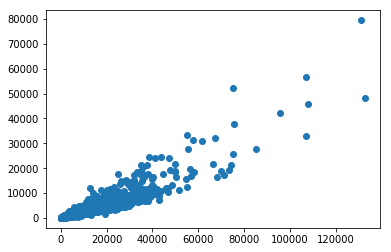

In [101]:
plt.scatter(data=df3_clean_9, x='favorite_count', y='retweet_count');

### 3.10 `df` : The structure of doggo, floofer, pupper, and puppo is messy.
#### Define
Add the `stage` column to restructure the table.
#### Code

In [102]:
# copy the previous dataset
df_clean_10 = df_clean_8.copy()

# aggregate the stage
columns_list = ['doggo', 'floofer', 'pupper', 'puppo']
for col in columns_list:
    df_clean_10[col] = df_clean_10[col].str.replace('None', '')
    
df_clean_10['stage'] = df_clean_10.doggo + df_clean_10.floofer + df_clean_10.pupper + df_clean_10.puppo

# drop other columns
df_clean_10.drop(columns=columns_list, inplace=True)

# deal with multiple stages
df_clean_10.loc[df_clean_10.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_clean_10.loc[df_clean_10.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_clean_10.loc[df_clean_10.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# deal with none stage
df_clean_10.loc[df_clean_10.stage == '', 'stage'] = np.nan

#### Test

In [103]:
df_clean_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2072 non-null int64
timestamp        2072 non-null datetime64[ns]
source           2072 non-null object
text             2072 non-null object
expanded_urls    2072 non-null object
rating           2072 non-null float64
name             2072 non-null object
stage            334 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 145.7+ KB


In [104]:
df_clean_10.stage.value_counts()

pupper           219
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

### 3.11 `df3` : `df1` and `df3` should not be seperated.
#### Define
Combine `df3` with `df`.
#### Code

In [106]:
df_clean_11 = df_clean_10.copy()
df_clean_11 = pd.merge(df_clean_11, df3_clean_9, on='tweet_id', how='left')

#### Test

In [107]:
df_clean_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 10 columns):
tweet_id          2072 non-null int64
timestamp         2072 non-null datetime64[ns]
source            2072 non-null object
text              2072 non-null object
expanded_urls     2072 non-null object
rating            2072 non-null float64
name              2072 non-null object
stage             334 non-null object
favorite_count    2072 non-null int64
retweet_count     2072 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 178.1+ KB


## 4. Store

In [108]:
df_clean_11.to_csv('twitter-archive-master.csv', index=False)

## 5. Analysis and Visualization
### 5.1 Question 1: What is the distribution of rating?

In [109]:
df_clean = pd.read_csv('twitter-archive-master.csv')
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,41048,9774


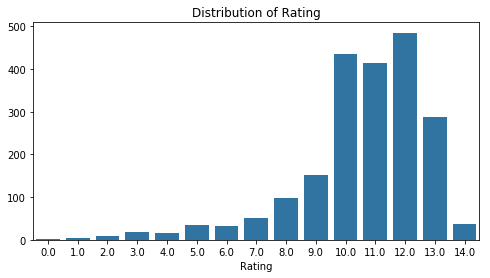

In [124]:
# plot the distribution of rating
plt.figure(figsize=[8, 4])
base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, x='rating', color=base_color)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('');

The above plot tells us that most of the rating is distributed in 10-12, and there is a steep gap between the score 9 and 10. The proportion of rating over 13 and below 8 is small.
### 5.2 Question 2: What is the relationship between stage and rating?

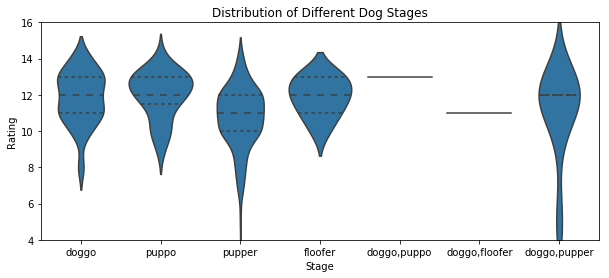

In [126]:
# plot the relationship of stage and rating
plt.figure(figsize=[10, 4])
sns.violinplot(data=df_clean, x='stage', y='rating', color=base_color, inner='quartile')
plt.title('Distribution of Different Dog Stages')
plt.xlabel('Stage')
plt.ylabel('Rating')
plt.ylim(4, 16);

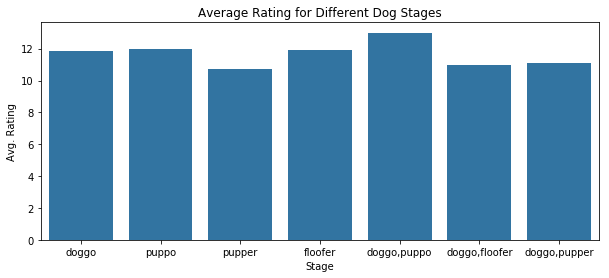

In [127]:
# plot the relationship of stage and rating
plt.figure(figsize=[10, 4])
sns.barplot(data=df_clean, x='stage', y='rating', color=base_color, ci=None)
plt.title('Average Rating for Different Dog Stages')
plt.xlabel('Stage')
plt.ylabel('Avg. Rating');

Without considering doggo,poppo, doggo,floofer, and np.nan stage, the pupper has a lower median of rating than other four stages. The pupper and doggo,pupper has a wider range of rating. The mode of rating of puppo is higher than others. The average rating of these five types are nearly the same, with all of them over 10.
### 5.3 Question 3: How can the confidence predict whether the prediction is a breed of dog?
In order to answer this question, we need to build a logistic regression model into this dataset.

In [118]:
df2_clean = pd.read_csv('image-predictions.tsv', sep='\t')
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [119]:
# creat the dummy variable
df2_clean['intercept'] = 1
df2_clean[['p1_notdog', 'p1_isdog']] = pd.get_dummies(df2_clean.p1_dog)
df2_clean[['p2_notdog', 'p2_isdog']] = pd.get_dummies(df2_clean.p2_dog)
df2_clean[['p3_notdog', 'p3_isdog']] = pd.get_dummies(df2_clean.p3_dog)
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,intercept,p1_notdog,p1_isdog,p2_notdog,p2_isdog,p3_notdog,p3_isdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,1,0,1,0,1,0,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1,0,1,0,1,0,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,1,0,1,0,1,0,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,1,0,1,0,1,0,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,1,0,1,0,1,0,1


In [120]:
# the logistic regression model of p1
import statsmodels.api as sm

log_mod = sm.Logit(df2_clean.p1_isdog, df2_clean[['intercept', 'p1_conf']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.221737
         Iterations 5


/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               p1_isdog   No. Observations:                 2075
Model:                          Logit   Df Residuals:                     2073
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                     inf
Time:                        20:59:54   Log-Likelihood:                -460.11
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4545      0.116      3.919      0.000       0.227       0.682
p1_conf        1.0099      0.187      5.407      0.000       0.644       1.376
==============================================================================
"""

In [122]:
# the logistic regression model of p2
log_mod = sm.Logit(df2_clean.p2_isdog, df2_clean[['intercept', 'p2_conf']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.215697
         Iterations 5


/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               p2_isdog   No. Observations:                 2075
Model:                          Logit   Df Residuals:                     2073
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                     inf
Time:                        21:00:12   Log-Likelihood:                -447.57
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7763      0.083      9.364      0.000       0.614       0.939
p2_conf        2.4448      0.536      4.565      0.000       1.395       3.495
==============================================================================
"""

In [121]:
# the logistic regression model of p3
log_mod = sm.Logit(df2_clean.p3_isdog, df2_clean[['intercept', 'p3_conf']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.234679
         Iterations 5


/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               p3_isdog   No. Observations:                 2075
Model:                          Logit   Df Residuals:                     2073
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                     inf
Time:                        21:00:02   Log-Likelihood:                -486.96
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8456      0.075     11.215      0.000       0.698       0.993
p3_conf        1.8721      0.985      1.901      0.057      -0.058       3.802
==============================================================================
"""

In [79]:
# interpret the result
np.exp(1.0099), np.exp(2.4448), np.exp(1.8721)

(2.745326468642962, 11.5282437195147, 6.50193613843872)

The result indicates that holding other variables constant, when the confidence level increase 1 unit, the true prediction is 2.75 times, 11.53 times, and 6.50 times as likely respectively.